In [1]:
# import modules needed
# also - before this is done - need to make sure that opencv is installed
import cv2
import numpy as np
from matplotlib import pyplot as plt
import glob

In [2]:
def compute_face_crop(image_file):
    
    # This will take an image file, and will return information about where the face is, the image with the face bounding box, and the cropped image
    
    # read image, copy it so nothing funky happens, convert to grayscale for opencv
    img = cv2.imread(image_file,cv2.IMREAD_COLOR)
    imgtest1 = img.copy()
    imgtest = cv2.cvtColor(imgtest1, cv2.COLOR_BGR2GRAY)

    # load the face classifier
    facecascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
    
    # run the face classifier for the image. returns bounding box of the face
    faces = facecascade.detectMultiScale(imgtest, scaleFactor=1.2, minNeighbors=5)
    
    # plot the image and the bounding box of the face
    for (x, y, w, h) in faces:
        # detect the face region
        face_detect = cv2.rectangle(imgtest, (x, y), (x+w, y+h), (255, 0, 255), 2)

        # save the cropped image
        cropped_image = img[y:y+h, x:x+w]
        
    return faces, face_detect, cropped_image
        

In [3]:
# for each jpg image in a directory, collect file name in list
txtfiles = [] 
for file in glob.glob("/Users/kiah/Desktop/face-in-art/images/original_images/*.jpg"):
    txtfiles.append(file)
print(txtfiles)

['/Users/kiah/Desktop/face-in-art/images/original_images/mona_lisa.jpg', '/Users/kiah/Desktop/face-in-art/images/original_images/headshot_kiahhardcastle.jpg']


(232, 232, 3)
(436, 436, 3)


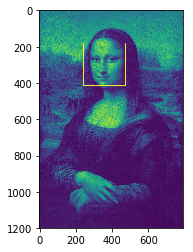

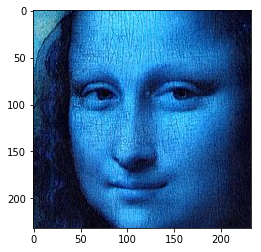

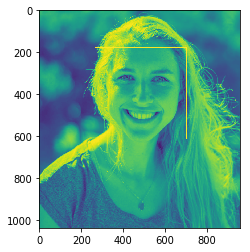

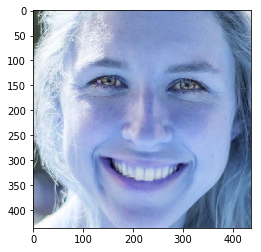

In [10]:
cropped_image_directory = "/Users/kiah/Desktop/face-in-art/images/cropped_images/"
box_image_directory = "/Users/kiah/Desktop/face-in-art/images/box_images/"
for image_file in txtfiles:
    
    # run the face-cropping algorithm
    faces, face_detect, cropped_image = compute_face_crop(image_file)
    
    # get image name
    name_pieces = image_file.split('/')
    image_name = name_pieces[-1]
    image_name = image_name.split('.')
    image_name = image_name[0]
    
    # plot the face with box around it, and the cropped image
    plt.figure()
    plt.imshow(face_detect)
    plt.figure()
    plt.imshow(cropped_image)
    print(cropped_image.shape)
    
    # save the images
    image_box_name = box_image_directory + image_name + '_box.jpg'
    cv2.imwrite(image_box_name,face_detect)
    
    cropped_image_name = cropped_image_directory + image_name  + '_cropped.jpg'
    cv2.imwrite(cropped_image_name,cropped_image)
    